In [ ]:
# !pip uninstall torchtext
!pip install torchtext


In [ ]:
# !pip uninstall portalocker
!pip install portalocker --no-cache-dir


In [ ]:
# !pip uninstall accelerate
!pip install accelerate -U --no-cache-dir


In [1]:
from datasets import load_dataset

# IMDB 데이터셋 로드
imdb_dataset = load_dataset("imdb")

# 훈련 및 테스트 데이터 분리
train_iter = imdb_dataset["train"]
test_iter = imdb_dataset["test"]

# 데이터 샘플 확인
print(train_iter[0])  # 첫 번째 리뷰 출력


/mnt/d/workspace/colab_try/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [2]:
from datasets import load_dataset

# IMDB 데이터셋 로드
imdb_dataset = load_dataset("imdb")

# 훈련 및 테스트 데이터 분리
train_iter = imdb_dataset["train"]
test_iter = imdb_dataset["test"]


import random
random.seed(7)

train_list = list(train_iter)
test_list = list(test_iter)
train_lists_small = random.sample(train_list, 1000)
test_lists_small = random.sample(test_list, 1000)
print("CCC")

print(train_lists_small[0])
print(test_lists_small[0])

CCC
{'text': 'I thought that the nadir of horror film making had been reached with "Book of Shadows", I was wrong. This film makes that look like "The Magnficiant Ambersons" compared to this piece of shameless, unexpurgated fecal matter that has the audacity to call itself a movie. I\'d write more but I\'m still to angry that I was idiot enough to spend £3 renting it, bobbins.<br /><br />And were these people English? and where is the forest> I have lived in the UK two thirds of my life and as far as I know there are no dark uncharted woodlands in the midlands. The whole bally thing looked like a national trust conifer plantation. Those angels looked like anorexic pornstars (turned most of them were, did my research). I did however like the bit when Judd got ripped in pieces.<br /><br />P.S I love and admire Tom Savini but HE CANNOT ACT', 'label': 0}
{'text': "Seven months since a revelatory viewing of Faces, I finally found a rentable DVD copy of Cassavetes' first feature. Shot on a s

## 레이블 인코딩

- 텍스트와 레이블을 Tuple pair
- 긍정 2
- 부정 1
- 2를 -> 1로
- 1을 -> 2로

In [ ]:
train_texts = []
train_labels = []

# train_lists_small에 담긴 튜플 쌍 원소를 변수명 label과 text를 부여하여 순서대로 추출
for _train in train_lists_small:
    train_labels.append(_train['label'])  # ✅ label을 원래대로 유지
    train_texts.append(_train['text'])

test_texts = []
test_labels = []

for _test in test_lists_small:
    test_labels.append(_test['label'])  # ✅ label을 원래대로 유지
    test_texts.append(_test['text'])


print(train_texts[0])
print(train_labels[0])
print(test_texts[0])
print(test_labels[0])

I thought that the nadir of horror film making had been reached with "Book of Shadows", I was wrong. This film makes that look like "The Magnficiant Ambersons" compared to this piece of shameless, unexpurgated fecal matter that has the audacity to call itself a movie. I'd write more but I'm still to angry that I was idiot enough to spend £3 renting it, bobbins.<br /><br />And were these people English? and where is the forest> I have lived in the UK two thirds of my life and as far as I know there are no dark uncharted woodlands in the midlands. The whole bally thing looked like a national trust conifer plantation. Those angels looked like anorexic pornstars (turned most of them were, did my research). I did however like the bit when Judd got ripped in pieces.<br /><br />P.S I love and admire Tom Savini but HE CANNOT ACT
0
Seven months since a revelatory viewing of Faces, I finally found a rentable DVD copy of Cassavetes' first feature. Shot on a shoestring in Manhattan and in his acti

## 학습 및 검증 데이터 분리
학습데이터 800개와 테스트 검증데이터 200개

In [4]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels,  val_labels = train_test_split(train_texts, train_labels, test_size=.2, random_state=2)
print(len(train_texts))
print(len(train_labels))
print(len(val_texts))
print(len(val_labels))

800
800
200
200


## 토크나이징 및 인코딩
사전 학습된 distilbert-based-uncased 모델에 투입하기 위해 토크나이저를 사용하여 인코딩

토큰은 입력 텍스트의 기본 구성요소를 의미하며, 일반적으로 단어를 지칭합니다.
토크나이징은 입력 텍스트를 단어로 구분해 내는 과정입니다.

토크나이징 결과를 딥러닝 모델이 사용하기 위해서는 잘게 구분된 토큰(텍스트 형태)을 숫자로 전환해야 합니다.
이 전환과정을 인코딩이라고 합니다.

In [ ]:
!pip install transformers

In [5]:
from transformers import DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [6]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

print(train_encodings["input_ids"][0][:5])
print(tokenizer.decode(train_encodings["input_ids"][0][:5]))

[101, 2019, 26316, 2135, 8321]
[CLS] an hilariously accurate


# 문제

데이터세트 클래스 생성

문제: Torch.utils.data.Dataset을 상속하는 IMDbDataset 라는 클래스를 스스로 작성하세요.

그리고 문제 007의 IMDb 데이터세트에서 생성한 학습 (Train_encodings), 검증(val_encodings), 테스트 데이터세트(test_encodings)를 입력해서

이 클래스를 인스턴스화합니다. 클래스 및 인스턴스화 개념은 문제 002를 참고하세요. 이를 데이터세트 후속 문제에서 파인튜닝에 사용합니다.

In [7]:
import torch
class IMDbDataset(DistilBertTokenizerFast):
    
    def __init__(self, encodings, labels):
        """생성자

        Args:
            encodings (_type_): 초기화
            labels (_type_): 초기화
        """        
        self.encodings = encodings
        self.labels = labels


    def __getitem__(self, idx: int):
        """아이템 반환 매서드

        Args:
            idx (integer): index

        Returns:
            _type_: _description_
        """ 
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    
    def __len__(self):
        return len(self.labels)

train_dataset = IMDbDataset(train_encodings, train_labels)
val_dataset = IMDbDataset(val_encodings, val_labels)
test_dataset = IMDbDataset(test_encodings, test_labels)

# 반복 가능 타입, 딕셔너리
for i in train_dataset:
    i['input_ids']
    break

## 사전 학습 모델 불러오기.!

DistilBertForSequenceClassification 클래스를 사용해서 사전 학습모델을 불러오세연

In [8]:
from transformers import DistilBertForSequenceClassification
from transformers import pipeline

# pipeline.model(DistilBertForSequenceClassification)
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

print(model)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


# TrainingARugments 설정.

TrainArguments 클래스를 호출해서 파인튜닝에 사용하기 위한 하이퍼 파라미터를 정의하세요.


딥러닝 신경망 모델에서 하이퍼 파라미터는 모델 최적화 과정에 관여하는 조절 가능한(adjustable) 파리미터를 의미합니다.

하이퍼파라미터 값을 변경함으로 모델 학습과정에 영향을 미친다.

In [16]:
from transformers import TrainingArguments

args = TrainingArguments('working_dir')
args = args.set_training(num_epochs=8, batch_size=16)
args = args.set_optimizer('adamw_torch')
args = args.set_testing(batch_size=64)
args

TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=False,
do_predict=True,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=IntervalStrategy.NO,
eval_use_

In [9]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir = './results',
    num_train_epochs=8,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10
)

training_args

TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=False,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=IntervalStrategy.NO,
eval_us

In [10]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = model.to(device)

model

cuda


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


# Trainer 클래스 사전학습

문제 004 부터 011까지의 과정에 기반한 Trainer 클래스를 인스턴스화 하고 파인튜닝을 하세요.

키워드 인수로 model, args, train_dataset, eval_dataset을 명확하게 전달하세요.

그리고 파인튜닝 전후에 다음 세 문장 각각의 극성(긍정/부정)판별 결과를 비교하세요.

In [11]:
# 파인튜닝 이전 세 입력 문장 극성 판별
# 토크 나이징.
input_tokens = tokenizer(["I feel fantastic", "My life is going something wrong",
                          "I have not figured out what the chosen title has to do with the move."
                          "I'm happy very very happy"],
                          truncation=True,
                          padding=True)


# 입력 문장 토크나이징 결과(input_tokens)에 담긴 input_ids를 모델에 투입
# 그리고 모델 출력 결과를 GPU로 전송하며 값은 변수 outputs에 저장
outputs = model(torch.tensor(input_tokens['input_ids']).to(device))
print(input_tokens['input_ids'])
print(outputs['logits'])

# Result 딕셔너리
label_dict = {0: 'positive', 1: 'negative'}

# outputs 변수에 담긴 logits 값을 행 단위, 즉 입력 문장 단위로 가장 큰 값의 위치(인덱스) 추출
# 껼과값(인덱스)을 CPU로 넘기고 넘파이 타입으로 변경 후, 인덱스에 매칭되는 레이블 출격
print([label_dict[i] for i in torch.argmax(outputs['logits'], axis=1).cpu().numpy()])

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


[[101, 1045, 2514, 10392, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2026, 2166, 2003, 2183, 2242, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2031, 2025, 6618, 2041, 2054, 1996, 4217, 2516, 2038, 2000, 2079, 2007, 1996, 2693, 1012, 1045, 1005, 1049, 3407, 2200, 2200, 3407, 102]]
tensor([[-0.0104,  0.0987],
        [-0.0141,  0.1220],
        [ 0.0589,  0.1088]], device='cuda:0', grad_fn=<AddmmBackward0>)
['negative', 'negative', 'negative']


In [12]:
from transformers import Trainer
trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset = val_dataset
)

trainer.train()

Step,Training Loss
10,0.719000
20,0.689700
30,0.632000
40,0.529500
50,0.382800
60,0.204300
70,0.097700
80,0.040900
90,0.020500
100,0.012100


TrainOutput(global_step=400, training_loss=0.08437328784493729, metrics={'train_runtime': 82.7747, 'train_samples_per_second': 77.318, 'train_steps_per_second': 4.832, 'total_flos': 847791351398400.0, 'train_loss': 0.08437328784493729, 'epoch': 8.0})

In [13]:
# 파인튜닝 이전 세 입력 문장 극성 판별
# 토크 나이징.
input_tokens = tokenizer(["I feel fantastic", "My life is going something wrong",
                          "I'm un happy. and angry bad sad"],
                          truncation=True,
                          padding=True)
print(input_tokens)
# 입력 문장 토크나이징 결과(input_tokens)에 담긴 input_ids를 모델에 투입
# 그리고 모델 출력 결과를 GPU로 전송하며 값은 변수 outputs에 저장
outputs = model(torch.tensor(input_tokens['input_ids']).to(device))

# Result 딕셔너리
label_dict = {0: 'positive', 1: 'negative'}

# outputs 변수에 담긴 logits 값을 행 단위, 즉 입력 문장 단위로 가장 큰 값의 위치(인덱스) 추출
# 껼과값(인덱스)을 CPU로 넘기고 넘파이 타입으로 변경 후, 인덱스에 매칭되는 레이블 출격

print([label_dict[i] for i in torch.argmax(outputs['logits'], axis=1).cpu().numpy()])

{'input_ids': [[101, 1045, 2514, 10392, 102, 0, 0, 0, 0, 0, 0, 0], [101, 2026, 2166, 2003, 2183, 2242, 3308, 102, 0, 0, 0, 0], [101, 1045, 1005, 1049, 4895, 3407, 1012, 1998, 4854, 2919, 6517, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}
['positive', 'positive', 'positive']


# 파이토치 사전학습

문제 004부터 011까지에 기반한 모델을 파인튜닝 하기 위해서 파이토치를 사용하세요.

문제 012에서는 Trainer 클래스를 사용헀지만 여기서는 파이토치를 사용합니다.

이후 파인튜닝 전 후에 다음 세문장 각각의 극성 판별결과를 비교하시오.


파이토치 파인튜닝 과정

1. 사전 학습 모델 및 토크나이저 불러오기
2. DataLoader 인스턴스화
3. 최적함수 정의
4. 모델을 학습(training)모드로 전환
5. 에포크 횟수만큼 반복
6. 최적화 함수의 그래디언트(기울기) 초기화
7. 모델을 사용한 추론
8. 손실 계산
9. 오차역전파
10. 가중치 업데이트

In [23]:
def test_inference(model, tokenizer):
    input_tokens = tokenizer(["I feel fantastic", "My life is going something wrong",
                            "I'm angry."],
                            truncation=True,
                            padding=True)

    outputs = model(torch.tensor(input_tokens['input_ids']).to(device))

    # Result 딕셔너리
    label_dict = {0: 'positive', 1: 'negative'}


    return [label_dict[i] for i in torch.argmax(outputs['logits'], axis=1).cpu().numpy()]

In [27]:
# 10단계

from torch.utils.data import DataLoader
from transformers import DistilBertForSequenceClassification, AdamW
from transformers import DistilBertTokenizerFast


# 1) 사전학습 모델과 토크나이저 불러오기
# 그리고 모델 실행결과에 to(device) 코드 추가
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
print(tokenizer)
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
model.to(device)

print(test_inference(model, tokenizer))

# 2)DataLoader 인스턴스화
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# 3)최적화 함수 정의
optim = AdamW(model.parameters(), lr=5e-5)  # 0.0005

# 4)모델을 학습(Train) 모드로 전환
# 이는 드롭아웃 및 배치 정규화에 영향을 미침
model.train()

losses = []

for epoch in range(8):
    print(f'epoch: {epoch}')
    for batch in train_loader:
        # 6)최적화 함수의 기울기(그래디언트) 초기화
        optim.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # 7)모델을 사용한 추론
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        # 8) 손실계산
        loss = outputs[0]
        print(loss)
        losses.append(loss)

        # 9)오차역전파
        loss.backward()

        # 10)가중치(weight) 업데이트
        optim.step()

# 모델을 eval 모드로 전환
model.eval()
print(test_inference(model, tokenizer))

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/d/workspace/colab_try/.venv/lib/python3.12/site-packages/transformers/optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


['negative', 'positive', 'positive']
epoch: 0
tensor(0.6857, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5413, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3633, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2181, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1525, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0778, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0532, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0407, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0295, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0229, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0157, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0131, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0111, device='cuda:0', grad_fn=<NllLossBackwa

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


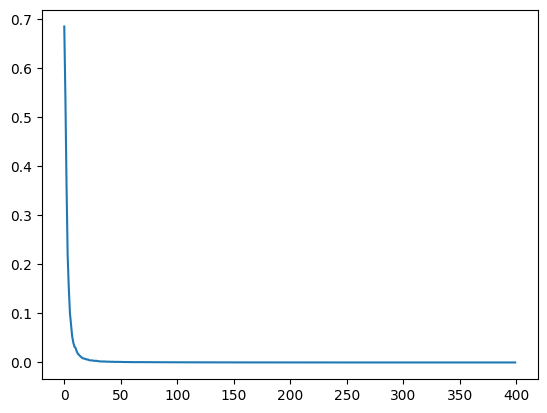

In [35]:
!pip install matplotlib
new_losses = [i.item() for i in losses]

import matplotlib.pyplot as plt

plt.plot(new_losses)
plt.show();